# puffs_sandbox
A sandbox for testing puffs datajoint database

In [1]:
import pandas as pd
import numpy as np
import os
import datajoint as dj
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
matplotlib.style.use('ggplot')
%matplotlib inline

<a id='connect'></a>
# Connect to the datajoint00 database
Username and password are same as Princeton login.

**Note**: You need to be on campus or using a VPN to connect to the database.

In [2]:
dj.config['database.host'] = 'datajoint00.pni.princeton.edu'
dj.config['database.user'] = os.environ.get('DJ_DB_USER')
dj.config['database.password'] = os.environ.get('DJ_DB_PASS')
dj.conn()

Connecting ahoag@datajoint00.pni.princeton.edu:3306


DataJoint connection (connected) ahoag@datajoint00.pni.princeton.edu:3306

In [3]:
db_puffs = dj.create_virtual_module('puffs','u19_puffs')
db_acq = dj.create_virtual_module('puffs','u19_acquisition')
# db_spockadmin = dj.create_virtual_module('ahoag_spockadmin_demo','ahoag_spockadmin_demo')
# db_lightsheet = dj.create_virtual_module('a','u19lightserv_lightsheet')

In [4]:
db_puffs.PuffsSession.Trial()

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,"trial_idx trial index, keep the original number in the file",task,level difficulty level,set_id parameter set id,"trial_type answer of this trial, left or right","choice choice of this trial, left or right",answered_correct,trial_prior_p_left prior probablity of this trial for left,trial_rel_start start time of the trial relative to the beginning of the session [seconds],trial_rel_finish end time of the trial relative to the beginning of the session [seconds],trial_duration duration of the trial [seconds],cue_period duration of cue period [seconds],num_puffs_intended_l number of puffs intended on the left side,num_puffs_received_r number of puffs actually received on the right side,num_puffs_intended_r number of puffs intended on the right side,num_puffs_received_l number of puffs actually received on the left side,reward_rel_start timing of reward relative to the beginning of the session [seconds],reward_scale subject is given 4 microliters * reward_scale as a reward,rule
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,0,AirPuffs,4,1,R,R,1,0.5,91.8706,104.329,12.4581,3.8,2,13,13,2,97.8268,1.0,0
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,1,AirPuffs,4,1,R,R,1,0.5,104.416,116.824,12.4074,3.8,2,15,15,2,110.308,1.0,0
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,2,AirPuffs,4,1,L,L,1,0.5,116.93,129.738,12.8076,3.8,10,2,2,10,123.224,1.0,0
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,3,AirPuffs,4,1,R,L,0,0.5,129.85,148.228,18.3784,3.8,2,10,10,2,0.0,1.0,0
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,4,AirPuffs,4,1,L,L,1,0.5,148.336,161.066,12.7304,3.8,8,2,2,8,154.547,1.0,0
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,5,AirPuffs,4,1,R,L,0,0.5,161.165,179.548,18.3829,3.8,2,7,7,2,0.0,1.0,0
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,6,AirPuffs,4,1,L,L,1,0.5,179.664,192.438,12.7741,3.8,12,2,2,12,185.921,1.0,0
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,7,AirPuffs,4,1,R,L,0,0.5,192.549,210.941,18.392,3.8,2,9,9,2,0.0,1.0,0
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,8,AirPuffs,4,1,L,L,1,0.5,211.042,221.284,10.2413,1.5,7,2,2,7,214.764,1.0,0
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,9,AirPuffs,4,1,R,L,0,0.5,221.392,239.863,18.4705,3.8,2,12,12,2,0.0,1.0,0


# Make psychometric curve.
To do that need to:
1. Select all trials for a given session 
2. Make a new column that is num_puffs_received_r - num_puffs_received_l
3. For each distinct value of #R-#L figure out the fraction of decisions to go R

In [5]:
db_acq.Session() & {'subject_fullname':'oostland_Tsc1_evidence_accumulation_48',
                                'session_date':'2019-12-28'}

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,session_start_time start time,session_end_time end time,session_location,task,level difficulty level,set_id parameter set id,stimulus_bank path to the function to generate the stimulus,stimulus_commit git hash for the version of the function,session_performance percentage correct on this session,num_trials Number of trials for the session,num_trials_try Accumulative number of trials for each try of the session,session_narrative,session_protocol function and parameters to generate the stimulus,"session_code_version code version of the stimulus, maybe a version number, or a githash",is_bad_session Flag that indicates if this session had any issues,session_comments Text to indicate some particularity of the session (e.g. state the issues in a bad session)
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,2019-12-28 11:49:26,2019-12-28 12:57:10,pni-ltl016-05,AirPuffs,9,1,,,34.8,270,=BLOB=,,None,=BLOB=,0,


In [6]:
alltrials=db_puffs.PuffsSession.Trial()
alltrials

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,"trial_idx trial index, keep the original number in the file",task,level difficulty level,set_id parameter set id,"trial_type answer of this trial, left or right","choice choice of this trial, left or right",answered_correct,trial_prior_p_left prior probablity of this trial for left,trial_rel_start start time of the trial relative to the beginning of the session [seconds],trial_rel_finish end time of the trial relative to the beginning of the session [seconds],trial_duration duration of the trial [seconds],cue_period duration of cue period [seconds],num_puffs_intended_l number of puffs intended on the left side,num_puffs_received_r number of puffs actually received on the right side,num_puffs_intended_r number of puffs intended on the right side,num_puffs_received_l number of puffs actually received on the left side,reward_rel_start timing of reward relative to the beginning of the session [seconds],reward_scale subject is given 4 microliters * reward_scale as a reward,rule
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,0,AirPuffs,4,1,R,R,1,0.5,91.8706,104.329,12.4581,3.8,2,13,13,2,97.8268,1.0,0
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,1,AirPuffs,4,1,R,R,1,0.5,104.416,116.824,12.4074,3.8,2,15,15,2,110.308,1.0,0
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,2,AirPuffs,4,1,L,L,1,0.5,116.93,129.738,12.8076,3.8,10,2,2,10,123.224,1.0,0
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,3,AirPuffs,4,1,R,L,0,0.5,129.85,148.228,18.3784,3.8,2,10,10,2,0.0,1.0,0
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,4,AirPuffs,4,1,L,L,1,0.5,148.336,161.066,12.7304,3.8,8,2,2,8,154.547,1.0,0
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,5,AirPuffs,4,1,R,L,0,0.5,161.165,179.548,18.3829,3.8,2,7,7,2,0.0,1.0,0
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,6,AirPuffs,4,1,L,L,1,0.5,179.664,192.438,12.7741,3.8,12,2,2,12,185.921,1.0,0
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,7,AirPuffs,4,1,R,L,0,0.5,192.549,210.941,18.392,3.8,2,9,9,2,0.0,1.0,0
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,8,AirPuffs,4,1,L,L,1,0.5,211.042,221.284,10.2413,1.5,7,2,2,7,214.764,1.0,0
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,9,AirPuffs,4,1,R,L,0,0.5,221.392,239.863,18.4705,3.8,2,12,12,2,0.0,1.0,0


In [11]:
psychometric_data = alltrials.proj('level','choice',
                                   'num_puffs_received_l',
                                   'num_puffs_received_r',
                                   nRminusnL='num_puffs_received_r-num_puffs_received_l')
psychometric_data

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,"trial_idx trial index, keep the original number in the file",level difficulty level,"choice choice of this trial, left or right",num_puffs_received_r number of puffs actually received on the right side,num_puffs_received_l number of puffs actually received on the left side,nRminusnL calculated attribute
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,0,4,R,13,2,11
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,1,4,R,15,2,13
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,2,4,L,2,10,-8
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,3,4,L,10,2,8
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,4,4,L,2,8,-6
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,5,4,L,7,2,5
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,6,4,L,2,12,-10
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,7,4,L,9,2,7
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,8,4,L,2,7,-5
oostland_Tsc1_evidence_accumulation_48,2019-12-28,0,9,4,L,12,2,10


In [12]:
df=psychometric_data.fetch(format="frame")

In [13]:
df['boolean_choice']=df['choice'].apply(lambda x: int(x == 'R'))

In [14]:
df

level  \
subject_fullname                       session_date session_number trial_idx          
oostland_Tsc1_evidence_accumulation_48 2019-12-28   0              0              4   
                                                                   1              4   
                                                                   2              4   
                                                                   3              4   
                                                                   4              4   
...                                                                             ...   
oostland_Tsc1_evidence_accumulation_53 2019-12-28   0              247            6   
                                                                   248            6   
                                                                   249            6   
                                                                   250            6   
                                                                   251            6   

                                                                             choice  \
subject_fullname                       session_date session_number trial_idx          
oostland_Tsc1_evidence_accumulation_48 2019-12-28   0              0              R   
                                                                   1              R   
                                                                   2              L   
                                                                   3              L   
                                                                   4              L   
...                                                                             ...   
oostland_Tsc1_evidence_accumulation_53 2019-12-28   0              247            R   
                                                                   248            R   
                                                                   249            R   
                                                                   250            R   
                                                                   251            L   

                                                                              num_puffs_received_r  \
subject_fullname                       session_date session_number trial_idx                         
oostland_Tsc1_evidence_accumulation_48 2019-12-28   0              0                            13   
                                                                   1                            15   
                                                                   2                             2   
                                                                   3                            10   
                                                                   4                             2   
...                                                                                            ...   
oostland_Tsc1_evidence_accumulation_53 2019-12-28   0              247                          11   
                                                                   248                           2   
                                                                   249                           2   
                                                                   250                           9   
                                                                   251                           3   

                                                                              num_puffs_received_l  \
subject_fullname                       session_date session_number trial_idx                         
oostland_Tsc1_evidence_accumulation_48 2019-12-28   0              0                             2   
                                                                   1                             2   
                                                                   2           

In [15]:
df.groupby('nRminusnL')['boolean_choice'].agg(lambda x: sum(x)/len(x))

nRminusnL
-14    1.000000
-13    0.285714
-12    0.250000
-11    0.421053
-10    0.416667
-9     0.387755
-8     0.388889
-7     0.276923
-6     0.272727
-5     0.304348
-4     0.206897
-3     0.267857
-2     0.333333
-1     0.309524
 1     0.263158
 2     0.339623
 3     0.466667
 4     0.625000
 5     0.602740
 6     0.594937
 7     0.750000
 8     0.685185
 9     0.592593
 10    0.615385
 11    0.909091
 12    0.857143
 13    0.800000
 14    1.000000
 15    1.000000
Name: boolean_choice, dtype: float64

(-12.0, 12.0)

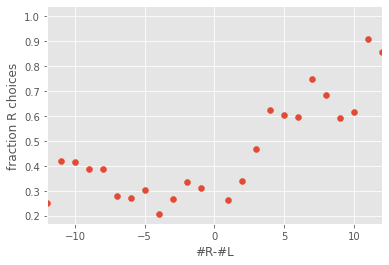

In [20]:
num_choices = df.groupby('nRminusnL').count()['boolean_choice']
num_R_choices = df.groupby('nRminusnL').sum()['boolean_choice']

fractionR_choices = num_R_choices/num_choices

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(fractionR_choices.index,fractionR_choices)
ax.set_xlabel('#R-#L')
ax.set_ylabel('fraction R choices')
ax.set_xlim(-12,12)

In [27]:
df_highlevels = df[df.loc[:,'level']>6]

(-12.0, 12.0)

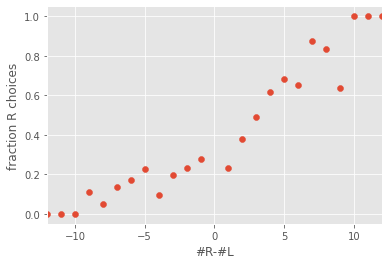

In [28]:
num_choices =df_highlevels.groupby('nRminusnL').count()['boolean_choice']
num_R_choices = df_highlevels.groupby('nRminusnL').sum()['boolean_choice']

fractionR_choices = num_R_choices/num_choices

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(fractionR_choices.index,fractionR_choices)
ax.set_xlabel('#R-#L')
ax.set_ylabel('fraction R choices')
ax.set_xlim(-12,12)

In [ ]:
trials_single_session = db_puffs.PuffsSession.Trial() & {'subject_fullname':'oostland_Tsc1_evidence_accumulation_48',
                                'session_date':'2019-12-28'}
trials_single_session

In [ ]:
psychometric_data = trials_single_session.proj('level','choice',nRminusnL='num_puffs_received_r-num_puffs_received_l')
psychometric_data

In [ ]:
df=psychometric_data.fetch(format="frame")

In [ ]:
df

In [ ]:
df['boolean_choice']=df['choice'].apply(lambda x: int(x == 'R'))

In [ ]:
num_choices = df.groupby('nRminusnL').count()['boolean_choice']
num_R_choices = df.groupby('nRminusnL').sum()['boolean_choice']

In [ ]:
fraction_R_choices = (num_R_choices/num_choices)

In [ ]:
fraction_R_choices.index

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(fraction_R_choices.index,fraction_R_choices)

## Sandbox begins

In [ ]:
username='lightserv-test'

In [ ]:
request_contents = db_lightsheet.Request()
clearing_batch_contents = db_lightsheet.Request.ClearingBatch()
imaging_request_contents = db_lightsheet.Request.ImagingRequest()
processing_request_contents = db_lightsheet.Request.ProcessingRequest()

In [ ]:
restrict_OR_list = [{"username":username},{"auditor":username}]
request_contents = request_contents & restrict_OR_list
imaging_request_contents = (request_contents*imaging_request_contents & restrict_OR_list).proj('imager',
                              'imaging_request_date_submitted',
                              'imaging_request_time_submitted',
                              'imaging_performed_date',
                              'imaging_progress')
processing_request_contents = (request_contents*processing_request_contents & restrict_OR_list).proj(
                            'processing_progress',
                            'processor')

In [ ]:
replicated_args = dict(is_archival='is_archival',number_of_samples='number_of_samples',description='description',
        species='species',datetime_submitted='datetime_submitted')

In [ ]:
sample_joined_contents = dj.U('username','request_name').aggr(
        request_contents * clearing_batch_contents,
        is_archival='is_archival',
        number_of_samples='number_of_samples',
        number_in_batch='number_in_batch',
        description='description',
        species='species',
        datetime_submitted='TIMESTAMP(date_submitted,time_submitted)',
        n_cleared='CONVERT(SUM(IF(clearing_progress="complete",number_in_batch,0)),char)').proj(
        **replicated_args,
            fraction_cleared='CONCAT(n_cleared,"/",CONVERT(number_of_samples,char))')

In [ ]:
imaging_joined_contents = sample_joined_contents.aggr(
    imaging_request_contents,
    **replicated_args,
    fraction_cleared='fraction_cleared',
    n_imaged='CONVERT(SUM(imaging_progress="complete"),char)',
    total_imaging_requests='CONVERT(COUNT(*),char)',
    keep_all_rows=True
    ).proj(**replicated_args,
        fraction_cleared='fraction_cleared',
        # fraction_imaged='CONCAT(n_imaged,"/",total_imaging_requests)'
        fraction_imaged='IF(n_imaged is NULL,"0/0",CONCAT(n_imaged,"/",total_imaging_requests))' 
        )

In [ ]:
processing_joined_contents = (dj.U('username','request_name') * imaging_joined_contents).aggr(   
    processing_request_contents,
    **replicated_args,
    fraction_cleared='fraction_cleared',
    fraction_imaged='fraction_imaged',
    n_processed='CONVERT(SUM(processing_progress="complete"),char)',
    total_processing_requests='CONVERT(COUNT(processing_progress),char)',
    keep_all_rows=True
    ).proj(
        **replicated_args,
        fraction_cleared='fraction_cleared',
        fraction_imaged='fraction_imaged',
        fraction_processed='IF(n_processed is NULL,"0/0",CONCAT(n_processed,"/",total_processing_requests))' 
        )

In [ ]:
processing_joined_contents

## Debugging all samples with auditor

In [ ]:
request_contents = db_lightsheet.Request()
request_contents = request_contents.proj('description','species','number_of_samples',
        'is_archival','auditor',
        datetime_submitted='TIMESTAMP(date_submitted,time_submitted)')
sample_contents = db_lightsheet.Request.Sample()
clearing_batch_contents = db_lightsheet.Request.ClearingBatch()
imaging_request_contents = db_lightsheet.Request.ImagingRequest()
processing_request_contents = db_lightsheet.Request.ProcessingRequest()

restrict_OR_list = [{"username":username},{"auditor":username}]
request_contents = request_contents & restrict_OR_list
sample_contents = (request_contents*sample_contents & restrict_OR_list).proj()

clearing_batch_contents = (request_contents*clearing_batch_contents & restrict_OR_list).proj(
    'clearer','clearing_progress','link_to_clearing_spreadsheet')
imaging_request_contents = (request_contents*imaging_request_contents & restrict_OR_list).proj(
    'imager','imaging_progress')
processing_request_contents = (request_contents*processing_request_contents & restrict_OR_list).proj(
    'processor','processing_progress')
sample_joined_contents = request_contents * sample_contents * clearing_batch_contents
replicated_args = dict(number_of_samples='number_of_samples',description='description',
        species='species',datetime_submitted='datetime_submitted',
        clearer='clearer',
        clearing_progress='clearing_progress',
        imager='imager',imaging_progress='imaging_progress',
        is_archival='is_archival',
        link_to_clearing_spreadsheet='link_to_clearing_spreadsheet')

In [ ]:
imaging_joined_contents = sample_joined_contents.aggr(
        imaging_request_contents,
        **replicated_args,
        imaging_request_number='imaging_request_number',
        n_imaged='CONVERT(SUM(imaging_progress="complete"),char)',
        total_imaging_requests='COUNT(*)',
        keep_all_rows=True
        ).proj(**replicated_args,
               total_imaging_requests='IF(n_imaged is NULL, "0",total_imaging_requests)',
               imaging_request_number='IF(imaging_request_number is NULL, "N/A",imaging_request_number)'
            # fraction_imaged='CONCAT(n_imaged,"/",total_imaging_requests)'
            )

In [ ]:
processing_joined_contents = (dj.U('username','request_name') * imaging_joined_contents).aggr(   
        processing_request_contents,
        **replicated_args,
        imaging_request_number='imaging_request_number',
        processing_request_number='processing_request_number',
        processor='processor',
        processing_progress='processing_progress',
        total_imaging_requests='total_imaging_requests',
        n_processed='CONVERT(SUM(processing_progress="complete"),char)',
        total_processing_requests='CONVERT(COUNT(processing_progress),char)',
        keep_all_rows=True
        ).proj(
            **replicated_args,
            processing_request_number='IF(processing_request_number is NULL, "N/A",processing_request_number)',
            processor='processor',
            processing_progress='processing_progress',
            total_imaging_requests='total_imaging_requests',
            total_processing_requests='IF(n_processed is NULL,0,total_processing_requests)', 
            )

In [ ]:
processing_joined_contents

In [ ]:
contents = db_lightsheet.Request() & [{"username":username},{"auditor":username}]
contents

In [ ]:
imaging_batch_restrict_dict = dict(username=username,request_name=request_name,
    imaging_batch_number=imaging_batch_number,
    imaging_request_number=imaging_request_number)
sample_contents = db_lightsheet.Request.ImagingBatchSample() & imaging_batch_restrict_dict

In [ ]:
sample_contents

In [ ]:
restrict_dict = {'username':'lightserv-test','request_name':'test_new_imaging_request'}
db_lightsheet.Request() & restrict_dict

In [ ]:
db_lightsheet.Request.ImagingRequest & restrict_dict

In [ ]:
db_lightsheet.Request.ImagingBatch() & restrict_dict

In [ ]:
request_contents = db_lightsheet.Request()
sample_contents = db_lightsheet.Request.Sample()
clearing_batch_contents = db_lightsheet.Request.ClearingBatch()
imaging_batch_contents = db_lightsheet.Request.ImagingBatch()

imaging_request_contents = (clearing_batch_contents * sample_contents * \
    request_contents * imaging_batch_contents).\
    proj('clearer','clearing_progress',
    'imaging_request_date_submitted','imaging_request_time_submitted',
    'imaging_progress','imager','species','number_in_imaging_batch',
    datetime_submitted='TIMESTAMP(imaging_request_date_submitted,imaging_request_time_submitted)')

In [ ]:
imaging_request_contents = dj.U('username','request_name',
                                'imaging_batch_number',
                                'imaging_request_number').aggr(
    imaging_request_contents,clearer='clearer',
    clearing_progress='clearing_progress',
    datetime_submitted='datetime_submitted',
    imaging_progress='imaging_progress',imager='imager',
    species='species',number_in_imaging_batch='number_in_imaging_batch',
    all_samples_cleared='SUM(IF(clearing_progress="complete",1,0))=count(*)')

In [ ]:
imaging_request_contents & restrict_dict

In [ ]:
imaging_request_contents & restrict_dict

In [ ]:
contents_being_imaged = imaging_request_contents & 'all_samples_cleared=1' & \
    'imaging_progress="in progress"'

In [ ]:
contents_being_imaged & restrict_dict

In [ ]:
imaging_request_contents & 'imaging_request_number=2'

In [ ]:
sample_restrict_dict = \
    {'sample_name': 'test-001', 'imaging_request_number': '2', 'imaging_batch_number': '1'}

In [ ]:
db_lightsheet.Request.ClearingBatchSample()

In [ ]:
(db_lightsheet.Request() & 'username="pbibawi"').fetch('request_name')

In [ ]:
username='willmore'
request_name='201106_willmore'
sample_name = '201106_willmore-303'
imaging_request_number=1
processing_request_number=1
processing_restrict_dict = dict(username=username,request_name=request_name,
                sample_name=sample_name,imaging_request_number=imaging_request_number,
                processing_request_number=processing_request_number)

processing_request_contents = db_lightsheet.Request.ProcessingRequest() & processing_restrict_dict

processing_resolution_request_contents = db_lightsheet.Request.ProcessingResolutionRequest() & \
    processing_restrict_dict

processing_channel_contents = db_lightsheet.Request.ProcessingChannel() & processing_restrict_dict
image_resolution='1.1x'
processing_channel_contents_this_resolution = (processing_channel_contents & \
            f'image_resolution="{image_resolution}"')
restrict_dict = {'channel_name':'488','ventral_up':0}
this_processing_channel_content = (processing_channel_contents_this_resolution & \
                    restrict_dict)
this_processing_channel_content

In [ ]:
username='willmore'
request_name='201106_willmore'
imaging_batch_number=1
imaging_request_number=1

restrict_dict = dict(username=username,request_name=request_name,
                imaging_batch_number=imaging_batch_number)

channel_contents_all_samples = (db_lightsheet.Request.ImagingChannel() & f'request_name="{request_name}"' & \
    f'username="{username}"' )
imaging_request_contents = db_lightsheet.Request.ImagingRequest() & \
    restrict_dict
imaging_resolution_contents = db_lightsheet.Request.ImagingResolutionRequest() & \
    restrict_dict
imaging_resolution_contents

In [ ]:
channel_contents_all_samples

In [ ]:
image_resolutions_no_processing = ["2x","3.6x","15x"]

In [ ]:
batch_unique_image_resolutions = set(imaging_resolution_contents.fetch('image_resolution'))
# batch_unique_image_re?solutions = set(['1.1x','3.6x'])

In [ ]:
have_processing_requests = any([x not in image_resolutions_no_processing for x in batch_unique_image_resolutions])
have_processing_requests

In [ ]:
set(imaging_request_contents.fetch('sample_name'))


In [ ]:
sample_names = set(imaging_resolution_contents.fetch('sample_name'))
sample_names

In [ ]:
data_rootpath = '/jukebox/LightSheetData/lightserv'

In [ ]:
message_body = ('Hello!\n\nThis is an automated email sent from lightserv, '
                        'the Light Sheet Microscopy portal at the Histology and Brain Registration Core Facility. '
                        'The raw data your request:\n'
                        f'request_name: "my-request"\n'
                        f'are now available on bucket here: \n\n')
for sample_name in sample_names:
    sample_basepath = os.path.join(data_rootpath,username,request_name,
    sample_name,f'imaging_request_number_{imaging_request_number}',  
    'rawdata')
    channel_contents_this_sample = channel_contents_all_samples & f'sample_name="{sample_name}"' 
    message_body += f'Sample name: {sample_name}:\n'
    for channel_dict in channel_contents_this_sample:
        channel_name = channel_dict['channel_name']
        image_resolution = channel_dict['image_resolution']
        ventral_up = channel_dict['ventral_up']
        rawdata_subfolder = channel_dict['rawdata_subfolder']
        if ventral_up:
            rawdata_fullpath = os.path.join(
                data_rootpath,username,request_name,sample_name,
                f'imaging_request_{imaging_request_number}',
                'rawdata',f'resolution_{image_resolution}_ventral_up',
                rawdata_subfolder)
            message_body += f'\tchannel {channel_name} (ventral up): {rawdata_fullpath}\n'
        else:
            rawdata_fullpath = os.path.join(
                data_rootpath,username,request_name,sample_name,
                f'imaging_request_{imaging_request_number}',
                'rawdata',f'resolution_{image_resolution}',
                rawdata_subfolder)
            message_body += f'\tchannel {channel_name}: {rawdata_fullpath}\n'
    message_body += '\n'
message_body += '\n'
if have_processing_requests:
    message_body += ('To start processing your data, '
            f'go to the processing management GUI: /some/path '
            'and find your sample to process.\n\n')
message_body += 'Thanks,\n\nThe Core Facility'
print(message_body)

In [ ]:
this_processing_channel_content_dict = this_processing_channel_content.fetch1()
this_processing_channel_content_dict

In [ ]:
processing_channel_contents_this_resolution

In [ ]:
db_lightsheet.Request.ProcessingResolutionRequest().fetch('atlas_name',limit=1)[0]

In [ ]:
processing_resolution_request_contents

In [ ]:
request_contents = db_lightsheet.Request()
sample_contents = db_lightsheet.Request.Sample()
clearing_batch_contents = db_lightsheet.Request.ClearingBatch()
imaging_request_contents = db_lightsheet.Request.ImagingRequest()
imaging_channel_contents = db_lightsheet.Request.ImagingChannel()

In [ ]:
imaging_channel_contents & 'ventral_up=1'

In [ ]:
processing_resolution_contents = db_lightsheet.Request.ProcessingResolutionRequest() & {'username':'willmore'}
processing_resolution_contents 

In [ ]:
dj.Table._update(processing_resolution_contents,'atlas_name','allen_2017')

In [ ]:
clearing_batch_contents

In [ ]:
combined_contents = (clearing_batch_contents * request_contents).proj(
'description','number_in_batch','expected_handoff_date',
'clearing_protocol','species',
'clearer','clearing_progress','clearing_protocol','antibody1','antibody2',
datetime_submitted='TIMESTAMP(date_submitted,time_submitted)')
''' First get all entities that are currently being cleared '''

In [ ]:
idiscoplus_cleared_contents = combined_contents & 'clearing_protocol="iDISCO+_immuno"' & 'clearing_progress="complete"'
idiscoplus_cleared_contents

In [ ]:
df_idiscoplus_cleared = (idiscoplus_cleared_contents).fetch(
format='frame',order_by='datetime_submitted DESC')

In [ ]:
df_idiscoplus_cleared.to_csv("idiscoplus_already_cleared_asof_2020Nov12.csv")

In [ ]:
idisco_contents = db_lightsheet.Request.IdiscoPlusClearing()
idisco_contents

In [ ]:
idisco_website_cleared_contents = idisco_contents * idiscoplus_cleared_contents
idisco_website_cleared_contents

In [ ]:
idisco_results=idisco_website_cleared_contents.fetch(as_dict=True)
idisco_results

In [ ]:
df_idisco=pd.DataFrame(idisco_results)
df_idisco

In [ ]:
df_idisco.to_csv('idiscoplus_antibody_notes_already_cleared_asof_2020Nov12.csv')

In [ ]:
imaging_channel_contents & \
    {'username': 'ahoag',
     'request_name': 'test123',
     'sample_name': 'test123-001',
     'imaging_request_number': 1,
     'image_resolution': '1.3x',
     'channel_name': '488'}

In [ ]:
clearing_batch_contents.fetch(as_dict=True,limit=2)

In [ ]:
clearing_batch_contents.fetch?

In [ ]:
imaging_channel_contents & 'request_name="test_many_samples4"' 

In [ ]:
insert_dict = {'username': 'ahoag', 'request_name': 'test_many_samples4',
               'imaging_request_number': 1, 'image_resolution': '1.1x',
               'channel_name': '555',
               'injection_detection': 1,
               'sample_name': 'test_many_samples4-001'}


In [ ]:
imaging_merged_contents = (imaging_request_contents \
    * clearing_batch_contents * sample_contents * request_contents * imaging_channel_contents).\
    proj('clearer','clearing_progress',
    'imaging_request_date_submitted','imaging_request_time_submitted',
    'imaging_progress','imager','species',
    'image_resolution','channel_name',
    datetime_submitted='TIMESTAMP(imaging_request_date_submitted,imaging_request_time_submitted)') & \
    {'username':'ahoag',}

In [ ]:
replicated_args = dict(username='username',species='species',
                       datetime_submitted='datetime_submitted',
                       imager='imager',imaging_progress='imaging_progress')

In [ ]:
interm=dj.U("username","request_name","sample_name","imaging_request_number").aggr(
    imaging_merged_contents,new_col='GROUP_CONCAT(channel_name ORDER BY channel_name)',**replicated_args,
    image_resolution='image_resolution').\
    proj(comb_col='CONCAT(image_resolution,",",new_col)',**replicated_args,)
interm

In [ ]:
interm2=dj.U('request_name','sample_name','imaging_request_number').aggr(interm,
    **replicated_args,
    final_col='GROUP_CONCAT(comb_col)')
interm2

In [ ]:
dj.U('request_name','imaging_request_number','final_col').aggr(interm2,                               
    **replicated_args,
    number_in_batch='COUNT(*)')

In [ ]:
replicated_args = dict(username='username',
                       imager='imager',imaging_progress='imaging_progress')

In [ ]:
interm=dj.U("username","request_name","sample_name","imaging_request_number").aggr(
                        imaging_channel_contents,new_col='GROUP_CONCAT(channel_name ORDER BY channel_name)',
                        image_resolution='image_resolution').\
                        proj(comb_col='CONCAT(image_resolution,",",new_col)')
interm

In [ ]:
interm2=dj.U('request_name','sample_name','imaging_request_number').aggr(interm,
    sample_name='MIN(sample_name)',imaging_str='GROUP_CONCAT(comb_col)')
interm2

In [ ]:
interm3=dj.U('request_name','imaging_request_number','imaging_str').aggr(interm2,                               
    number_in_batch='COUNT(*)',).proj('request_name','number_in_batch')
interm3

In [ ]:
request_counter_dict = {}

In [ ]:
interm3.fetch(as_dict=True)

In [ ]:
imaging_channel_contents & 'request_name="test_many_samples3"'

In [ ]:
db_lightsheet.Request.ImagingChannel() & 'request_name="test_many_samples2"'

In [ ]:
db_lightsheet.Request.ImagingRequest() & 'request_name="test_many_samples2"'

In [ ]:
db_lightsheet.Request.ImagingResolutionRequest() & 'request_name="test_many_samples2"'

In [ ]:
db_lightsheet.Request.ImagingChannel() & 'request_name="test_many_samples2"'

In [ ]:
contents = db_lightsheet.Request.ImagingChannel() & 'request_name="test_many_samples2"'

In [ ]:
contents.fetch?

In [ ]:
db_lightsheet.Request.ImagingChannel().insert(channel_entry_dicts,skip_duplicates=True)

In [ ]:
db_lightsheet.Request.ImagingChannel() & 'request_name="test_many_samples2"'

In [ ]:
sorted(set(["a","b","a","a"]))

In [ ]:
db_lightsheet.Request.ProcessingResolutionRequest() & 'request_name="test_many_samples2"'

In [ ]:
db_lightsheet.Request.ProcessingChannel() & 'request_name="test_many_samples2"'

In [ ]:
contents 

In [ ]:
var=4
s = f'{{var}} is the number'
s

In [ ]:
b = '1.3x_ventral_up'

In [ ]:
b if 'ventral_up' not in b else b.strip("_ventral_up")

In [ ]:
b.strip("_ventral_up")

In [ ]:
l=[{'id':'A','image_resolution':'4x','ventral_up':True},
   {'id':'B','image_resolution':'4x','ventral_up':False},
    {'id':'C','image_resolution':'1.3x','ventral_up':False},
    {'id':'D','image_resolution':'1.3x','ventral_up':False},
    {'id':'E','image_resolution':'1.3x','ventral_up':True}
  ]
tup_list = [(d['image_resolution'],d['ventral_up']) for d in l]
sorted(set(tup_list))

In [ ]:
all_channel_contents = imaging_channel_contents & 'request_name="test_dorsal_ventral"'

In [ ]:
results_list=all_channel_contents.fetch('image_resolution','ventral_up',as_dict=True)
tup_list = [(d['image_resolution'],d['ventral_up']) for d in results_list]
set(tup_list)
# all_channel_contents.fetch

In [ ]:
for a,b, in tup_list:
    print(a,b)

In [ ]:
bool(int('0'))

In [ ]:
job_contents = db_spockadmin.ProcessingPipelineSpockJob()
job_contents

In [ ]:
unique_contents = dj.U('jobid_step0','username',).aggr(
		job_contents,timestamp='max(timestamp)')*job_contents
unique_contents

In [ ]:
int(False)

In [ ]:
int(bool("False"))

In [ ]:
bool("False")